In [1]:
import numpy as np
import h5py
import pandas as pd
from itertools import islice
from collections import Counter
import re
from itertools import islice
from collections import Counter
from io import BytesIO
import matplotlib.pyplot as plt
import scipy
import qnorm 
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import sklearn
from bioinfokit.visuz import cluster
from rnanorm.normalization import cpm
from rnanorm.normalization import tpm
from rnanorm.normalization import quantile
import bioinfokit

In [2]:
import qnorm 

In [3]:
import scanpy 
from anndata import AnnData

In [4]:
import os
import pickle as pkl
import pydeseq2
from pydeseq2.DeseqDataSet import DeseqDataSet
from pydeseq2.DeseqStats import DeseqStats
from pydeseq2.utils import load_example_data

# Create top 12 000 genes with names ensemble

In [5]:
dee = pd.read_csv('dee_cross.csv')
exp = pd.read_csv('exp_cross.csv')
exp=exp.drop(columns = ['symbol', 'Unnamed: 0'],axis = 1)
dee=dee.drop(columns = ['symbol', 'Unnamed: 0'],axis = 1)
exp = exp.set_index('ensemble')
dee = dee.set_index('ensemble')

In [6]:
exp_mean=exp.mean(axis=1)
exp.insert(0, 'mean', exp_mean)
exp_sorted=exp.sort_values('mean',axis=0, ascending=False)
exp_sorted=exp_sorted.head(12000)
exp_sorted=exp_sorted.drop(columns = ['mean'],axis = 1)
index_list = exp_sorted.index.values.tolist ()
dee_sorted=dee.loc[index_list]

In [7]:
exp_top=exp_sorted
dee_top=dee_sorted

In [8]:
exp_top.to_csv('exp_top.csv')
dee_top.to_csv('dee_top.csv')

**Log+квантиль+cpm+центрирование**

```
def nor(a):
    b = cpm(a)
    c=quantile(b)
    d=np.log(c+1)
    # mean = np.mean(d, axis= 0)
    # t = d - mean
    return d
    ```

## Create great table without bone marrow derived macrophage and other macrophages

In [12]:
gt=pd.read_csv('great_table.csv')
gt = gt.loc[gt['Classes'] != 'other macrophage']
gt = gt.loc[gt['Classes'] != 'Bone Marrow Derived macrophages']

## Find samples with very high correlations

In [40]:
corr=exp_top.corrwith(dee_top, axis=0, drop=False, method='pearson')
check=corr.index [corr>=0.9 ]. tolist ()
dee=dee_top.drop(columns = check, axis = 1, inplace=False)
exp=exp_top.drop(columns = check, axis = 1, inplace=False)

# In one glp without bone marrow derives and other macro and for genes 12000 top expression with higher correlations (>0.9)

In [54]:
def pca_tsne_class(raws, great_table):
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    from sklearn.preprocessing import StandardScaler
    from bioinfokit.analys import get_data
    from bioinfokit.visuz import cluster
    from bioinfokit.analys import norm
    import numpy as np
    from rnanorm.normalization import cpm
    from rnanorm.normalization import tpm
    from rnanorm.normalization import quantile
    col=['red', 'blue','green', 'darkviolet', 'black', 'lime', 'gold']
    
    b = cpm(raws)
    c=quantile(b)
    samples=np.log(c+1)
    samples = samples - samples.mean()
    
    geo_from_great=great_table['geo_accession'].values.tolist() # из большой таблицы все gsm вынимаем
    samples_choised=samples.loc[:, samples.columns.intersection(geo_from_great)] # в наших данных оставляем только те же gsm
    gsm_list=samples_choised.columns.values.tolist() # и переносим их в список
    classes_list=great_table['Classes'].loc[great_table['geo_accession'].isin(gsm_list)]
    target = classes_list
    df=samples_choised.transpose()
  

    
    pca_out = PCA().fit(df)
    loadings = pca_out.components_
    pca_out.explained_variance_
    
    pca_scores = PCA().fit_transform(df)
    tsne_score=TSNE(learning_rate='auto').fit_transform(df)
    

    cluster.tsneplot(score=tsne_score, colorlist=target, show=True, dotsize=2, legendpos='best', colordot=col, legendanchor=[1,1])
    cluster.biplot(cscore=pca_scores, loadings=loadings,labels=df.columns.values.tolist(), var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist=target, show=True, dotsize=2, legendpos='best', colordot=col)

In [53]:
def pca_tsne_type(raws, great_table):
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    from sklearn.preprocessing import StandardScaler
    from bioinfokit.analys import get_data
    from bioinfokit.visuz import cluster
    from bioinfokit.analys import norm
    import numpy as np
    from rnanorm.normalization import cpm
    from rnanorm.normalization import tpm
    from rnanorm.normalization import quantile
    col=['red', 'blue','green']
    b = cpm(raws)
    c=quantile(b)
    samples=np.log(c+1)
    samples = samples - samples.mean()
    
    geo_from_great=great_table['geo_accession'].values.tolist() # из большой таблицы все gsm вынимаем
    samples_choised=samples.loc[:, samples.columns.intersection(geo_from_great)] # в наших данных оставляем только те же gsm
    gsm_list=samples_choised.columns.values.tolist() # и переносим их в список
    classes_list=great_table['Cell_type'].loc[great_table['geo_accession'].isin(gsm_list)]
    target = classes_list
    df=samples_choised.transpose()
  

    
    pca_out = PCA().fit(df)
    loadings = pca_out.components_
    pca_out.explained_variance_
    
    pca_scores = PCA().fit_transform(df)
    tsne_score=TSNE(learning_rate='auto').fit_transform(df)
    

    cluster.tsneplot(score=tsne_score, colorlist=target, show=True, dotsize=2, legendpos='best', colordot=col, legendanchor=[1,1])
    cluster.biplot(cscore=pca_scores, loadings=loadings,labels=df.columns.values.tolist(), var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist=target, show=True, dotsize=2, legendpos='best', colordot=col)

In [42]:
lister=exp.columns.tolist()

In [43]:
res=gt.loc[gt['geo_accession'].isin(lister)]

In [44]:
res.platform_id.value_counts().head(15)

GPL13112    351
GPL17021    332
GPL19057    202
GPL21103    131
GPL18480     54
GPL24247     44
GPL21626      8
GPL15103      8
GPL21273      3
GPL23479      2
Name: platform_id, dtype: int64

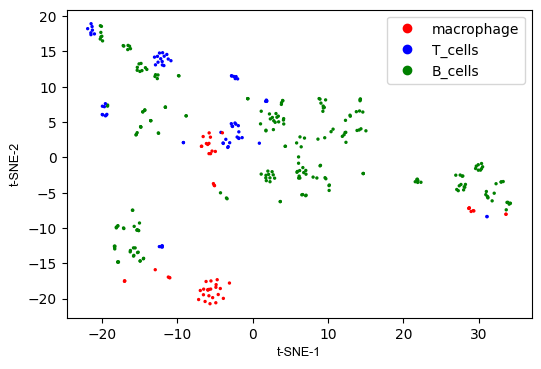

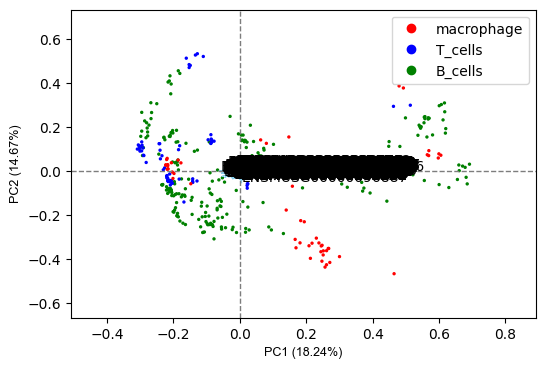

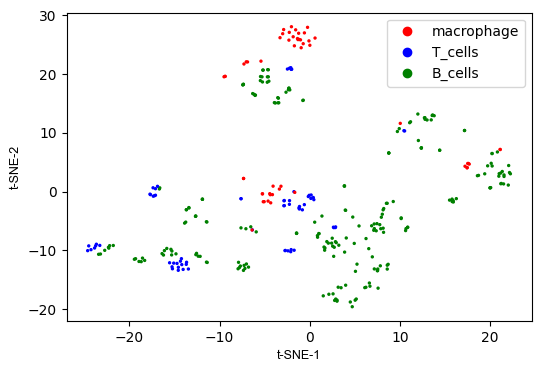

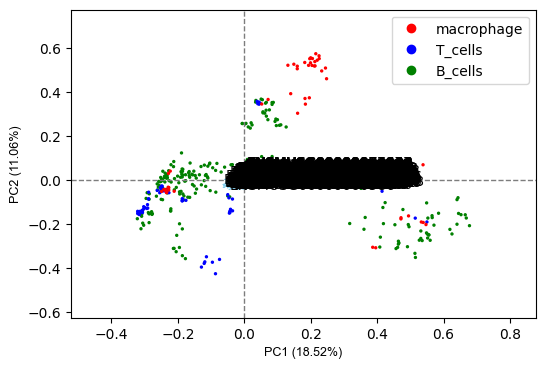

In [55]:
y=res.loc[res['platform_id']=='GPL13112']
pca_tsne_type (exp, y)
pca_tsne_type (dee, y)

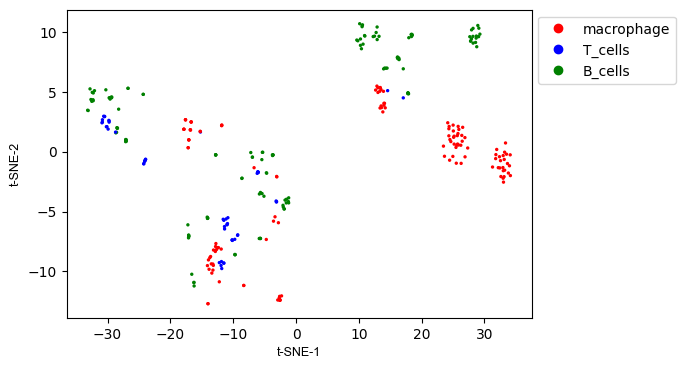

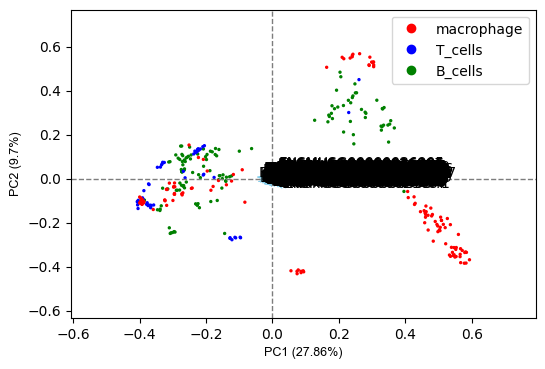

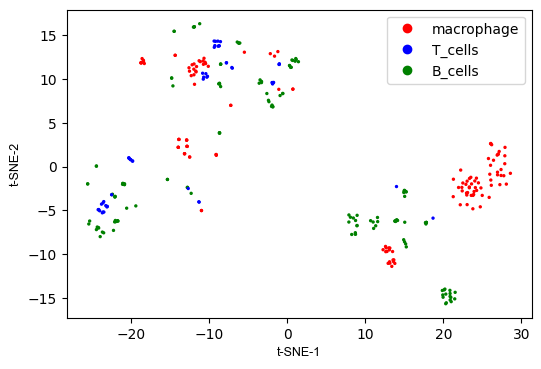

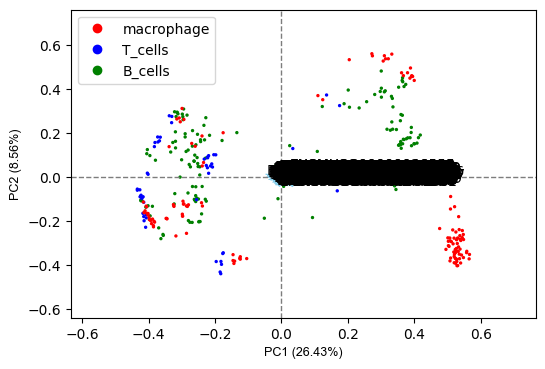

In [56]:
y=res.loc[res['platform_id']=='GPL17021']
pca_tsne_type (exp, y)
pca_tsne_type (dee, y)

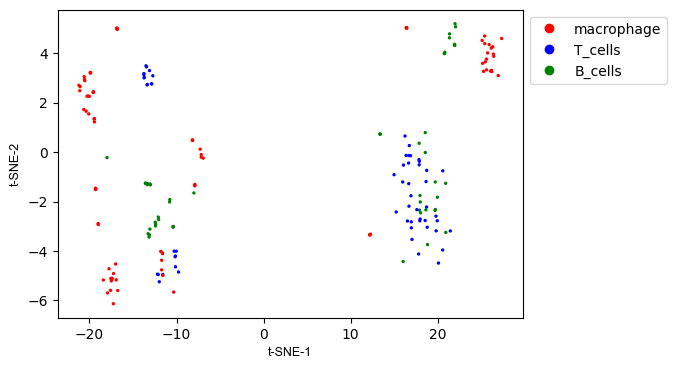

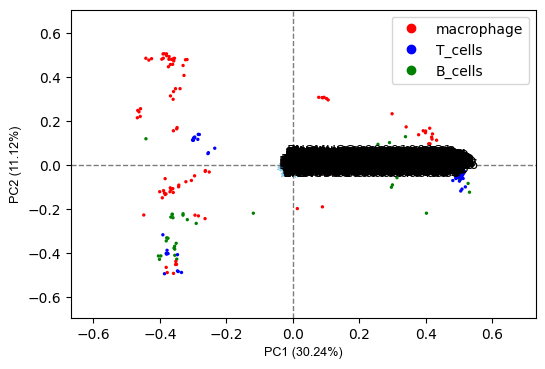

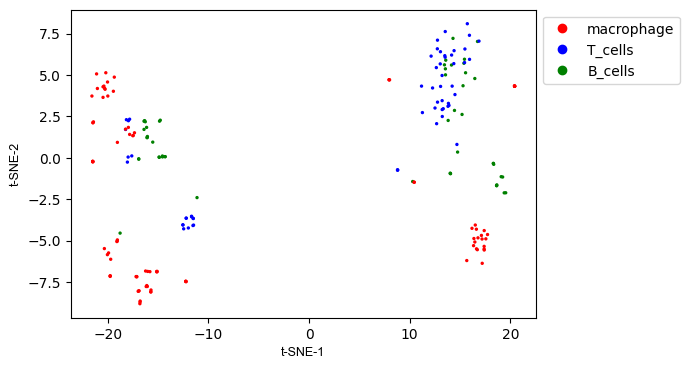

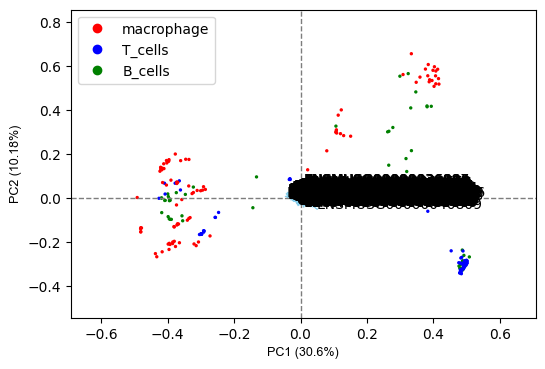

In [62]:

y=res.loc[res['platform_id']=='GPL19057']
pca_tsne_type (exp, y)
pca_tsne_type(dee, y)

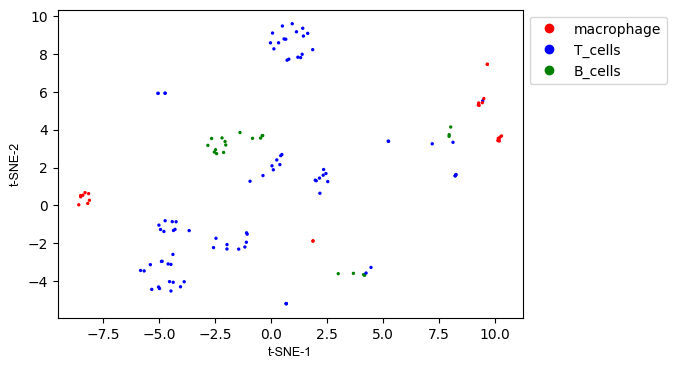

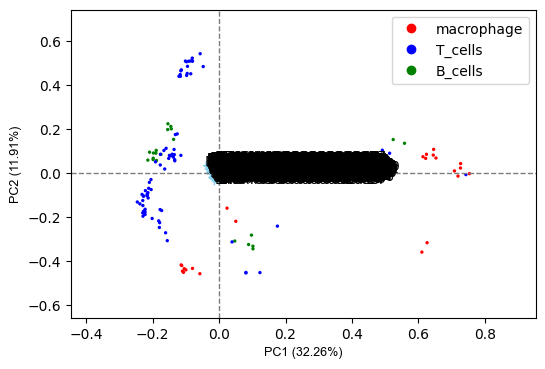

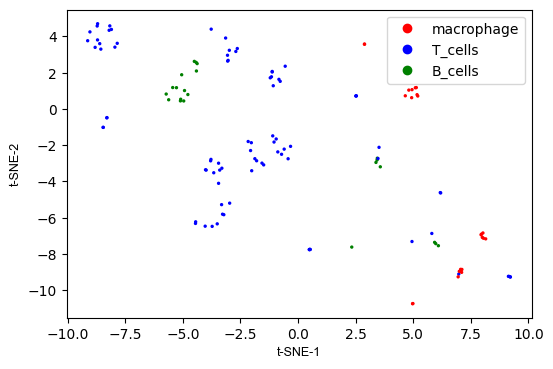

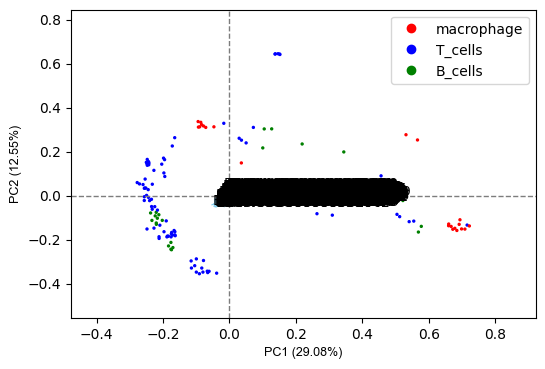

In [65]:
y=res.loc[res['platform_id']=='GPL21103']
pca_tsne_type (exp, y)
pca_tsne_type (dee, y)

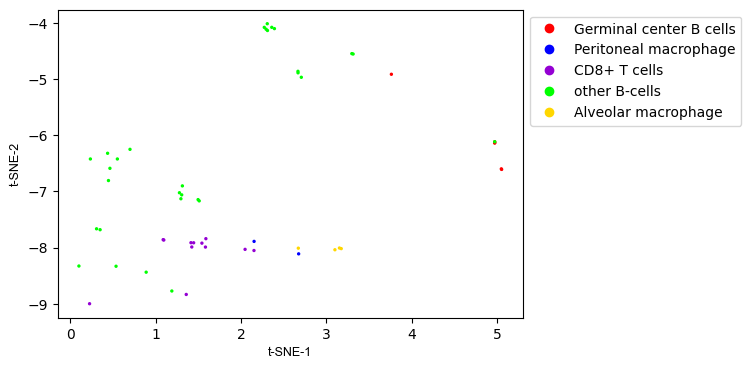

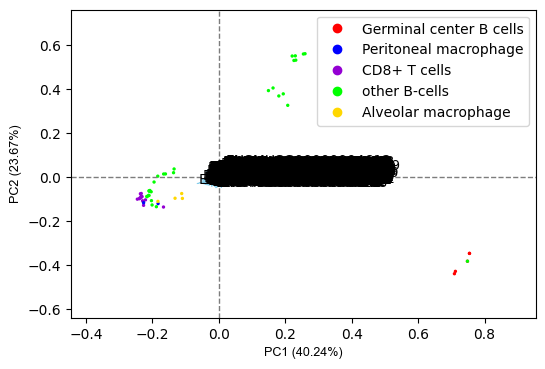

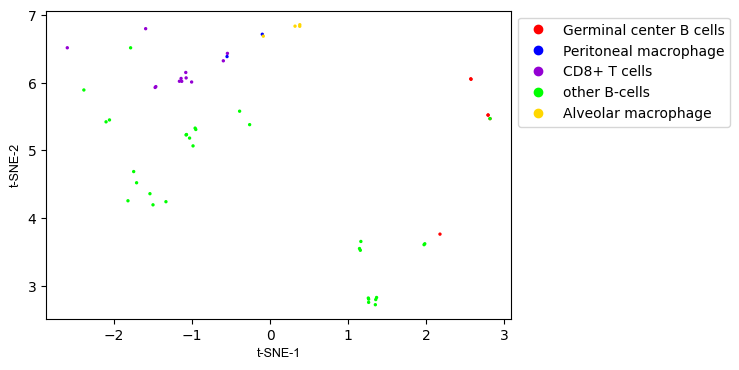

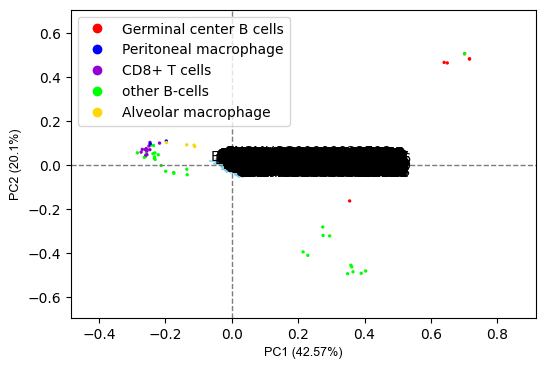

In [59]:
y=res.loc[res['platform_id']=='GPL18480']
pca_tsne_class (exp, y)
pca_tsne_class (dee, y)

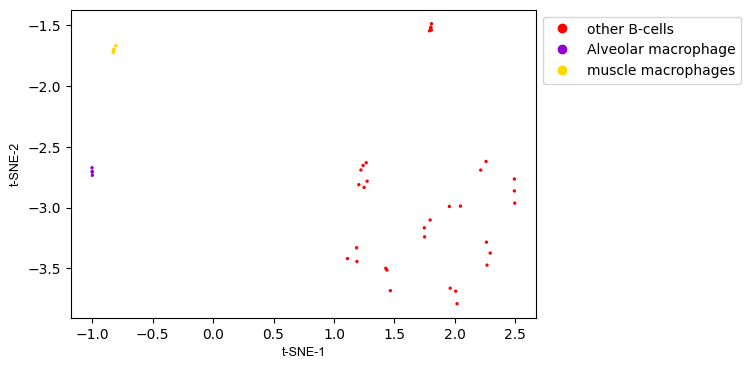

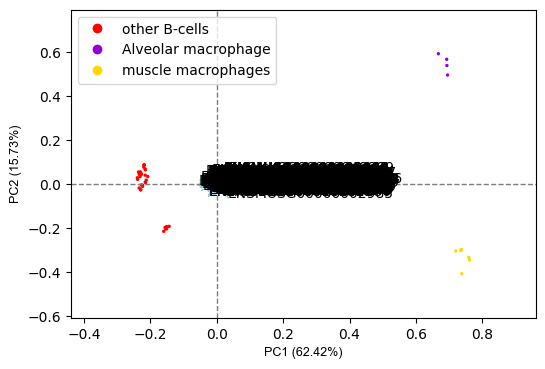

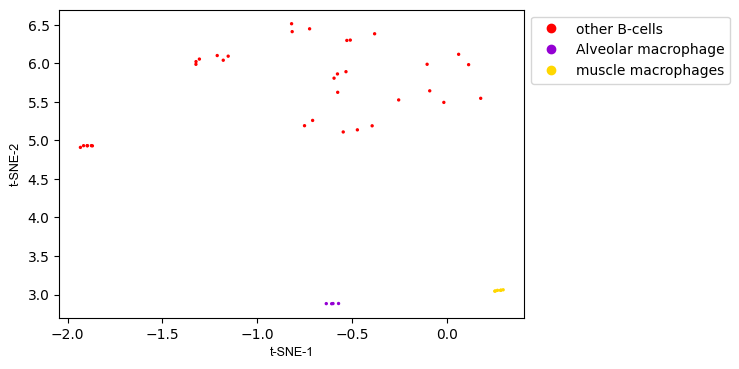

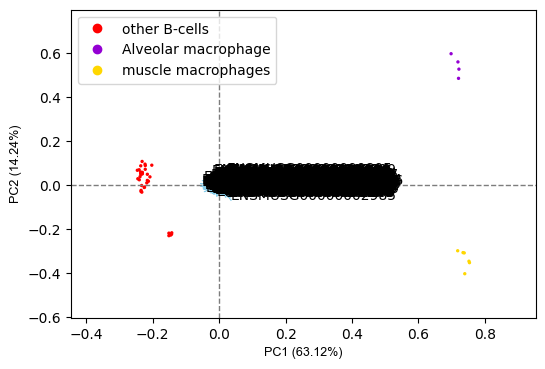

In [60]:

y=res.loc[res['platform_id']=='GPL24247']
pca_tsne_class (exp, y)
pca_tsne_class (dee, y)

# Create plots for different series in one glp with the same other conditions

In [61]:
def pca_tsne_series(raws, great_table):
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    from sklearn.preprocessing import StandardScaler
    from bioinfokit.analys import get_data
    from bioinfokit.visuz import cluster
    from bioinfokit.analys import norm
    import numpy as np
    from rnanorm.normalization import cpm
    from rnanorm.normalization import tpm
    from rnanorm.normalization import quantile
    col=['red', 'blue','green', 'black', 'purple', 'lime', 'gold', 'saddlebrown']
    
    b = cpm(raws)
    c=quantile(b)
    samples=np.log(c+1)
    samples = samples - samples.mean()
    
    geo_from_great=great_table['geo_accession'].values.tolist() # из большой таблицы все gsm вынимаем
    samples_choised=samples.loc[:, samples.columns.intersection(geo_from_great)] # в наших данных оставляем только те же gsm
    gsm_list=samples_choised.columns.values.tolist() # и переносим их в список
    classes_list=great_table['series_id'].loc[great_table['geo_accession'].isin(gsm_list)]
    target = classes_list
    df=samples_choised.transpose()
  

    
    pca_out = PCA().fit(df)
    loadings = pca_out.components_
    pca_out.explained_variance_
    
    pca_scores = PCA().fit_transform(df)
    tsne_score=TSNE(learning_rate='auto').fit_transform(df)
    

    cluster.tsneplot(score=tsne_score, colorlist=target, show=True, dotsize=2, legendpos='best', colordot=col, legendanchor=[1,1])
    cluster.biplot(cscore=pca_scores, loadings=loadings,labels=df.columns.values.tolist(), var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist=target, show=True, dotsize=2, legendpos='best', colordot=col)

In [63]:
list_of_glp=['GPL13112', 'GPL17021', 'GPL19057', 'GPL21103', 'GPL18480', 'GPL24247']

/Users/pavellebedev/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


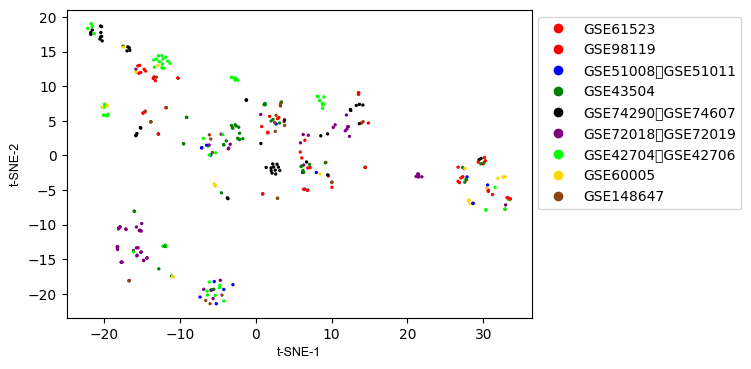

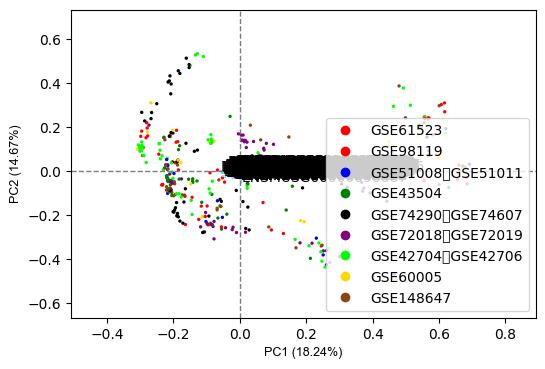

/Users/pavellebedev/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


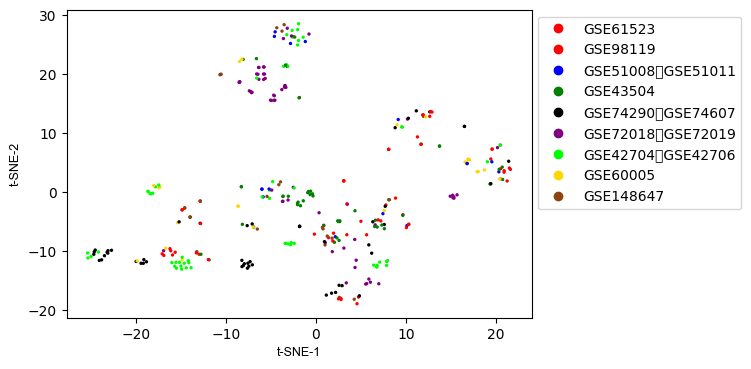

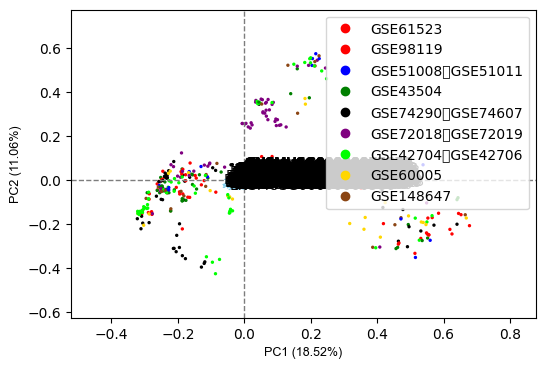

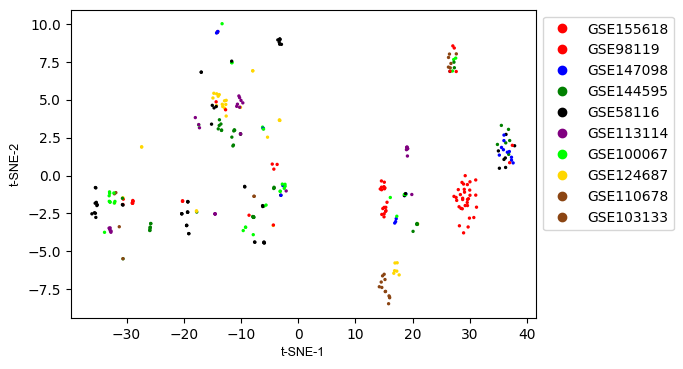

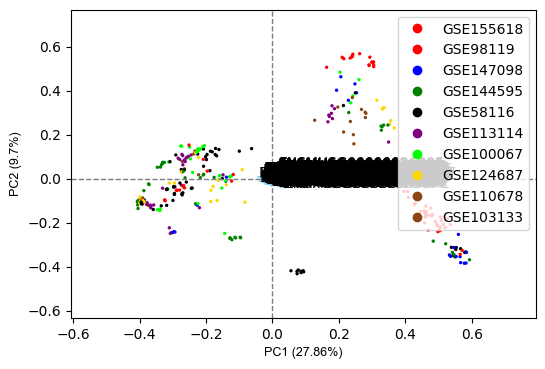

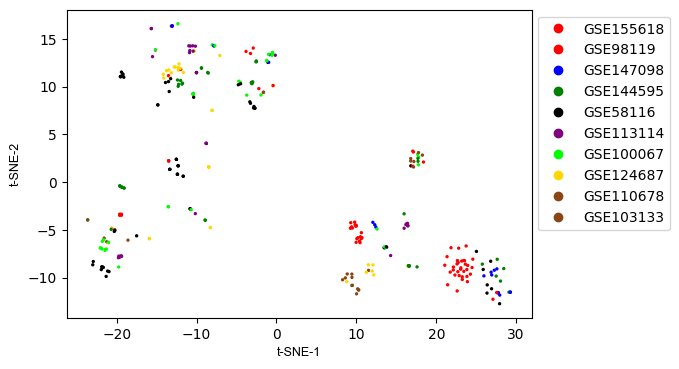

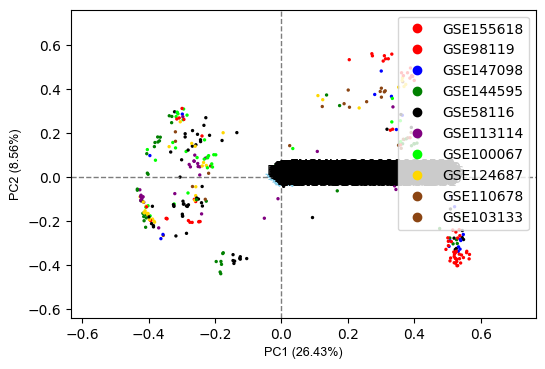

/Users/pavellebedev/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


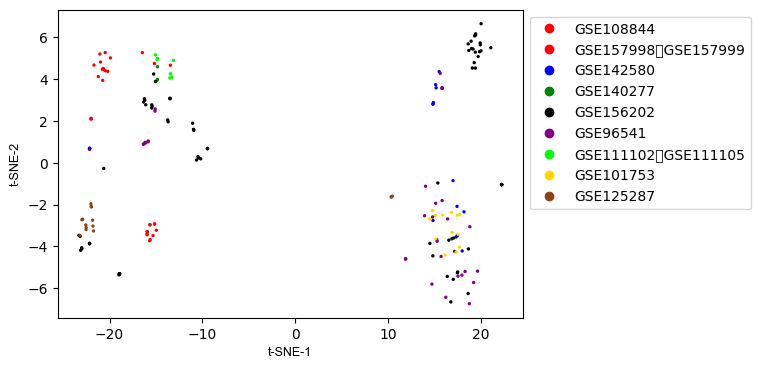

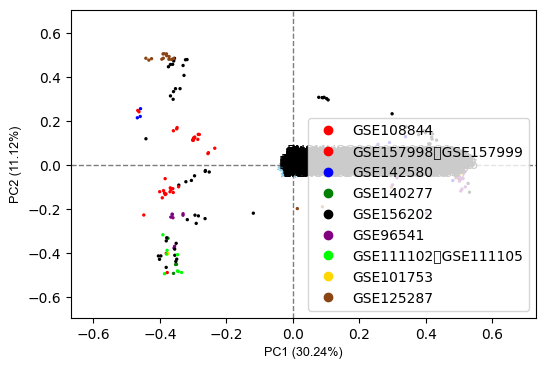

/Users/pavellebedev/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


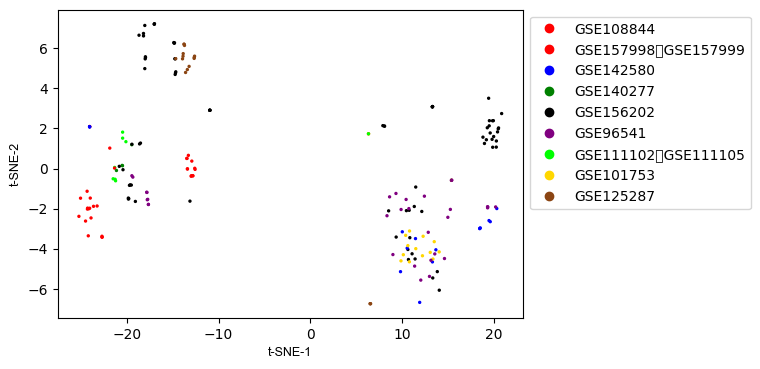

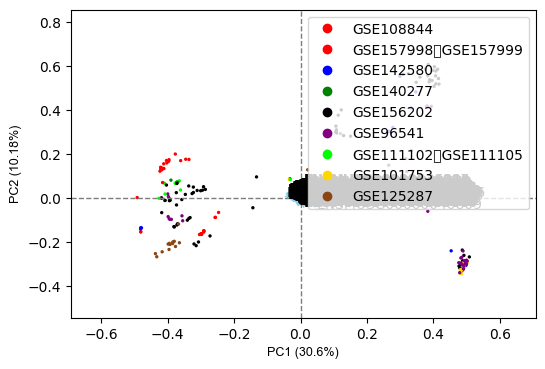

/Users/pavellebedev/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


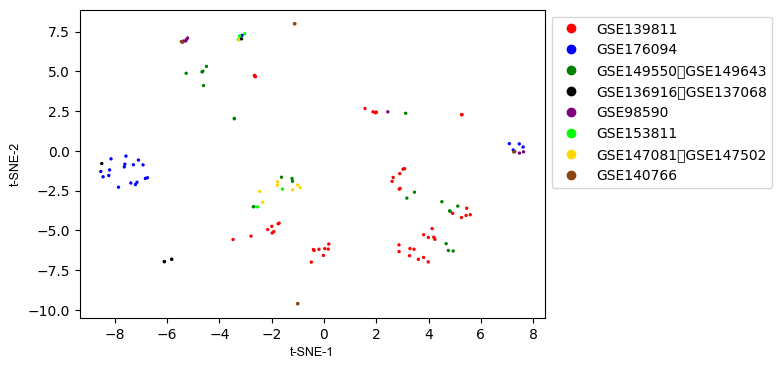

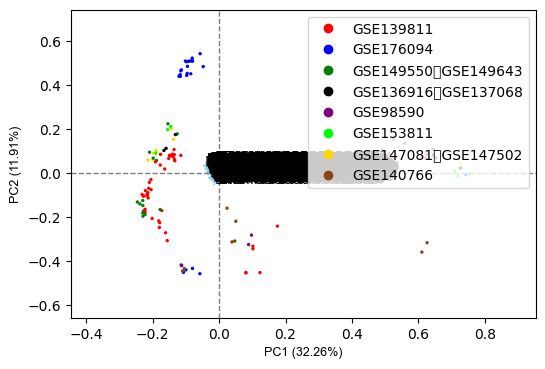

/Users/pavellebedev/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


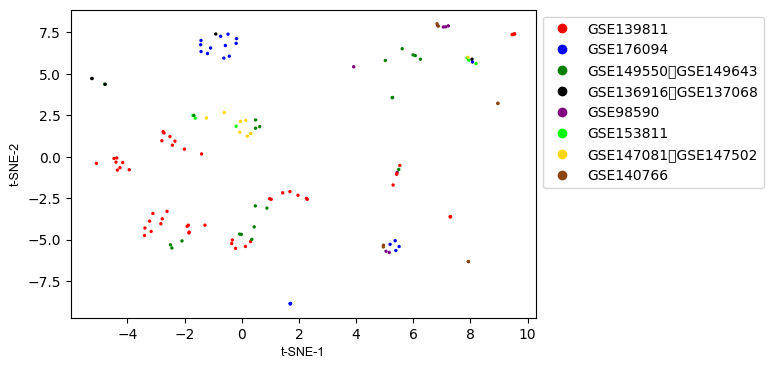

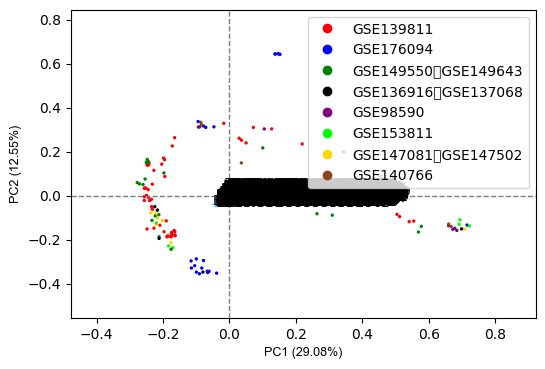

/Users/pavellebedev/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


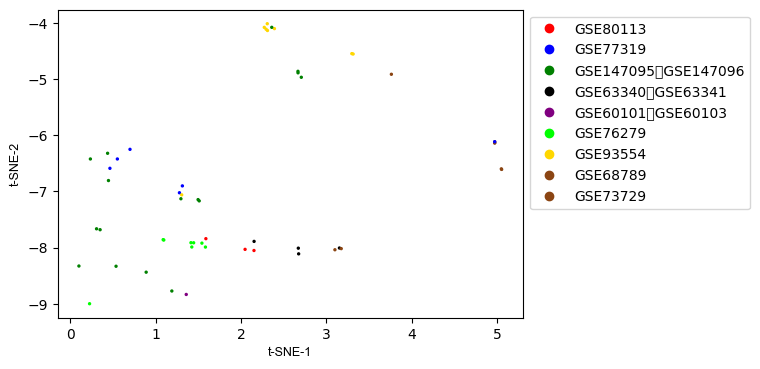

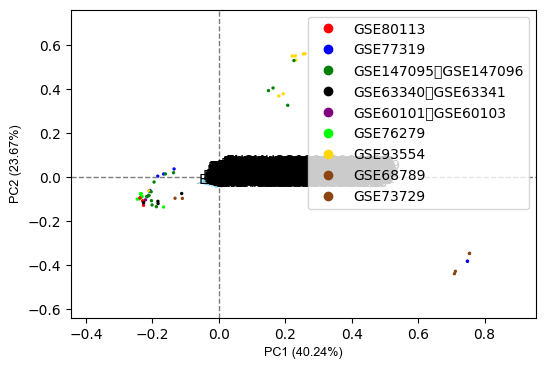

/Users/pavellebedev/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


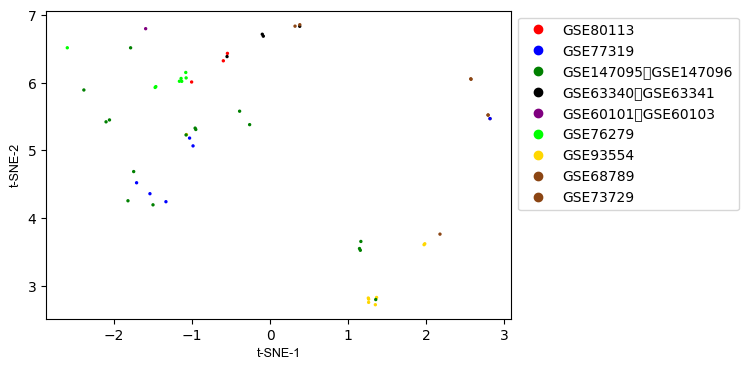

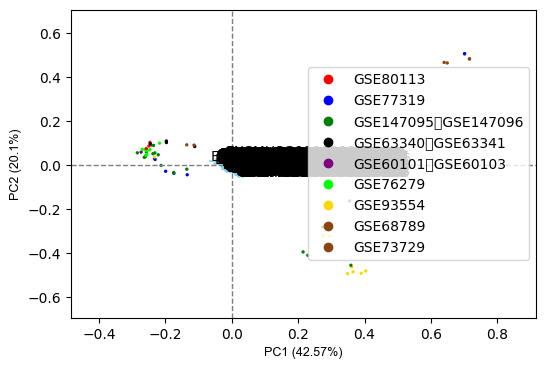

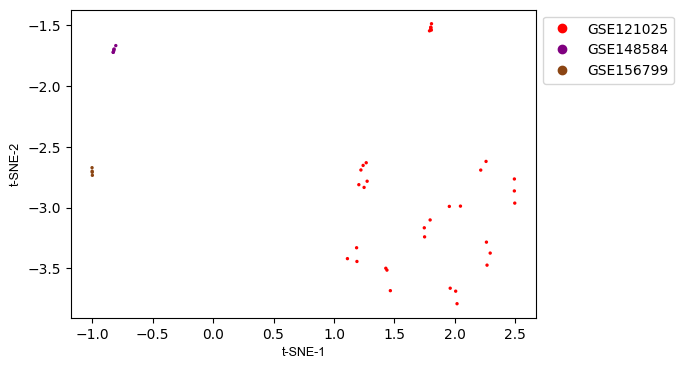

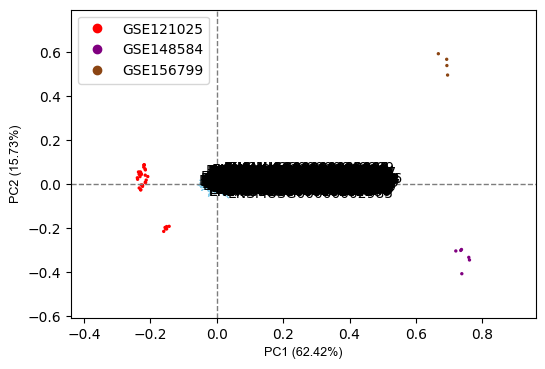

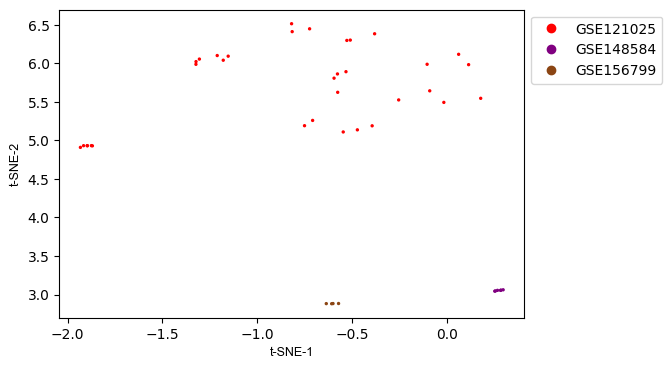

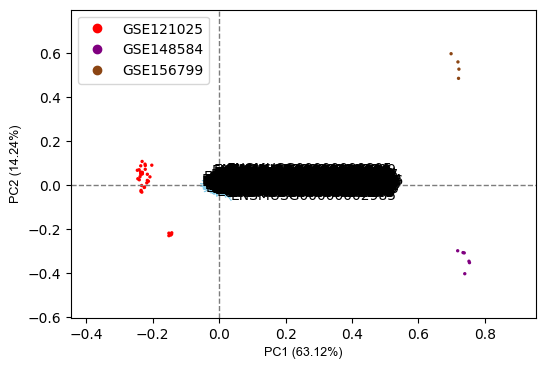

In [64]:
for i in list_of_glp:
    y=res.loc[res['platform_id']==i]
    pca_tsne_series (exp, y)
    pca_tsne_series (dee, y)